# Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
#import MAGAN

2024-05-16 11:29:42.285802: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 11:29:42.291548: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 11:29:42.385200: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 11:29:44.509637: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected
####tma.clear_directory()

#Converts old way of storing files to the new - if any
tma.change_old_files_to_new()

<><><><><><><><><><><><><><><><><><><><><><><>     Updates completed     <><><><><><><><><><><><><><><><><><><><><><><>


True

In [4]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="iris.csv", split = "turn", percent_of_anchors = [0.05], random_state=6739, verbose = 0)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_SPUD_tests(kind = ["distance"])
#test.run_DIG_tests(predict = True)
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#MAGAN.run_MAGAN(test.split_A, test.split_B, labels1 = test.labels)


In [5]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

#Save the Data Frame
df.to_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", index=False, na_rep='NaN')

2024-05-16 11:21:29.446557: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 11:21:29.452786: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 11:21:29.536250: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 11:21:29.750832: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 11:21:29.757240: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 11:21:29.850891: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary 

In [2]:
#If there is no new data, we could just read in the old csvfile
df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

In [3]:
from utils import get_DataFrame_stats
get_DataFrame_stats()

<><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>      DataFrame Statistics        <><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Total Number of instances in DataFrame: 368402


 Method        Lengths
--------      ----------
 SSMA:          26480
 DTA:          38990
 Nama:          4702
 SPUD:          173910
 DIG:          124320


----------------------       Splits      ----------------------
Total data of random: 125327

 random        Lengths
--------      ----------
 SSMA:          12560
 DTA:          12560
 Nama:          1257
 SPUD:          58820
 DIG:          40130


Total data of even: 38003

 even        Lengths
--------      ----------
 SSMA:          3410
 DTA:          3420
 Nama:          343
 SPUD:          20420
 DIG:          10410


Total data of skewed: 74550

 skewed        Lengths
--------      ----------
 SSMA:          10500
 DTA:          10500
 Nama:          1050
 SPUD:          21000
 DIG:          31500


Total d

# Visualization Tests

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from utils import subset_df, plot_in_fig

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

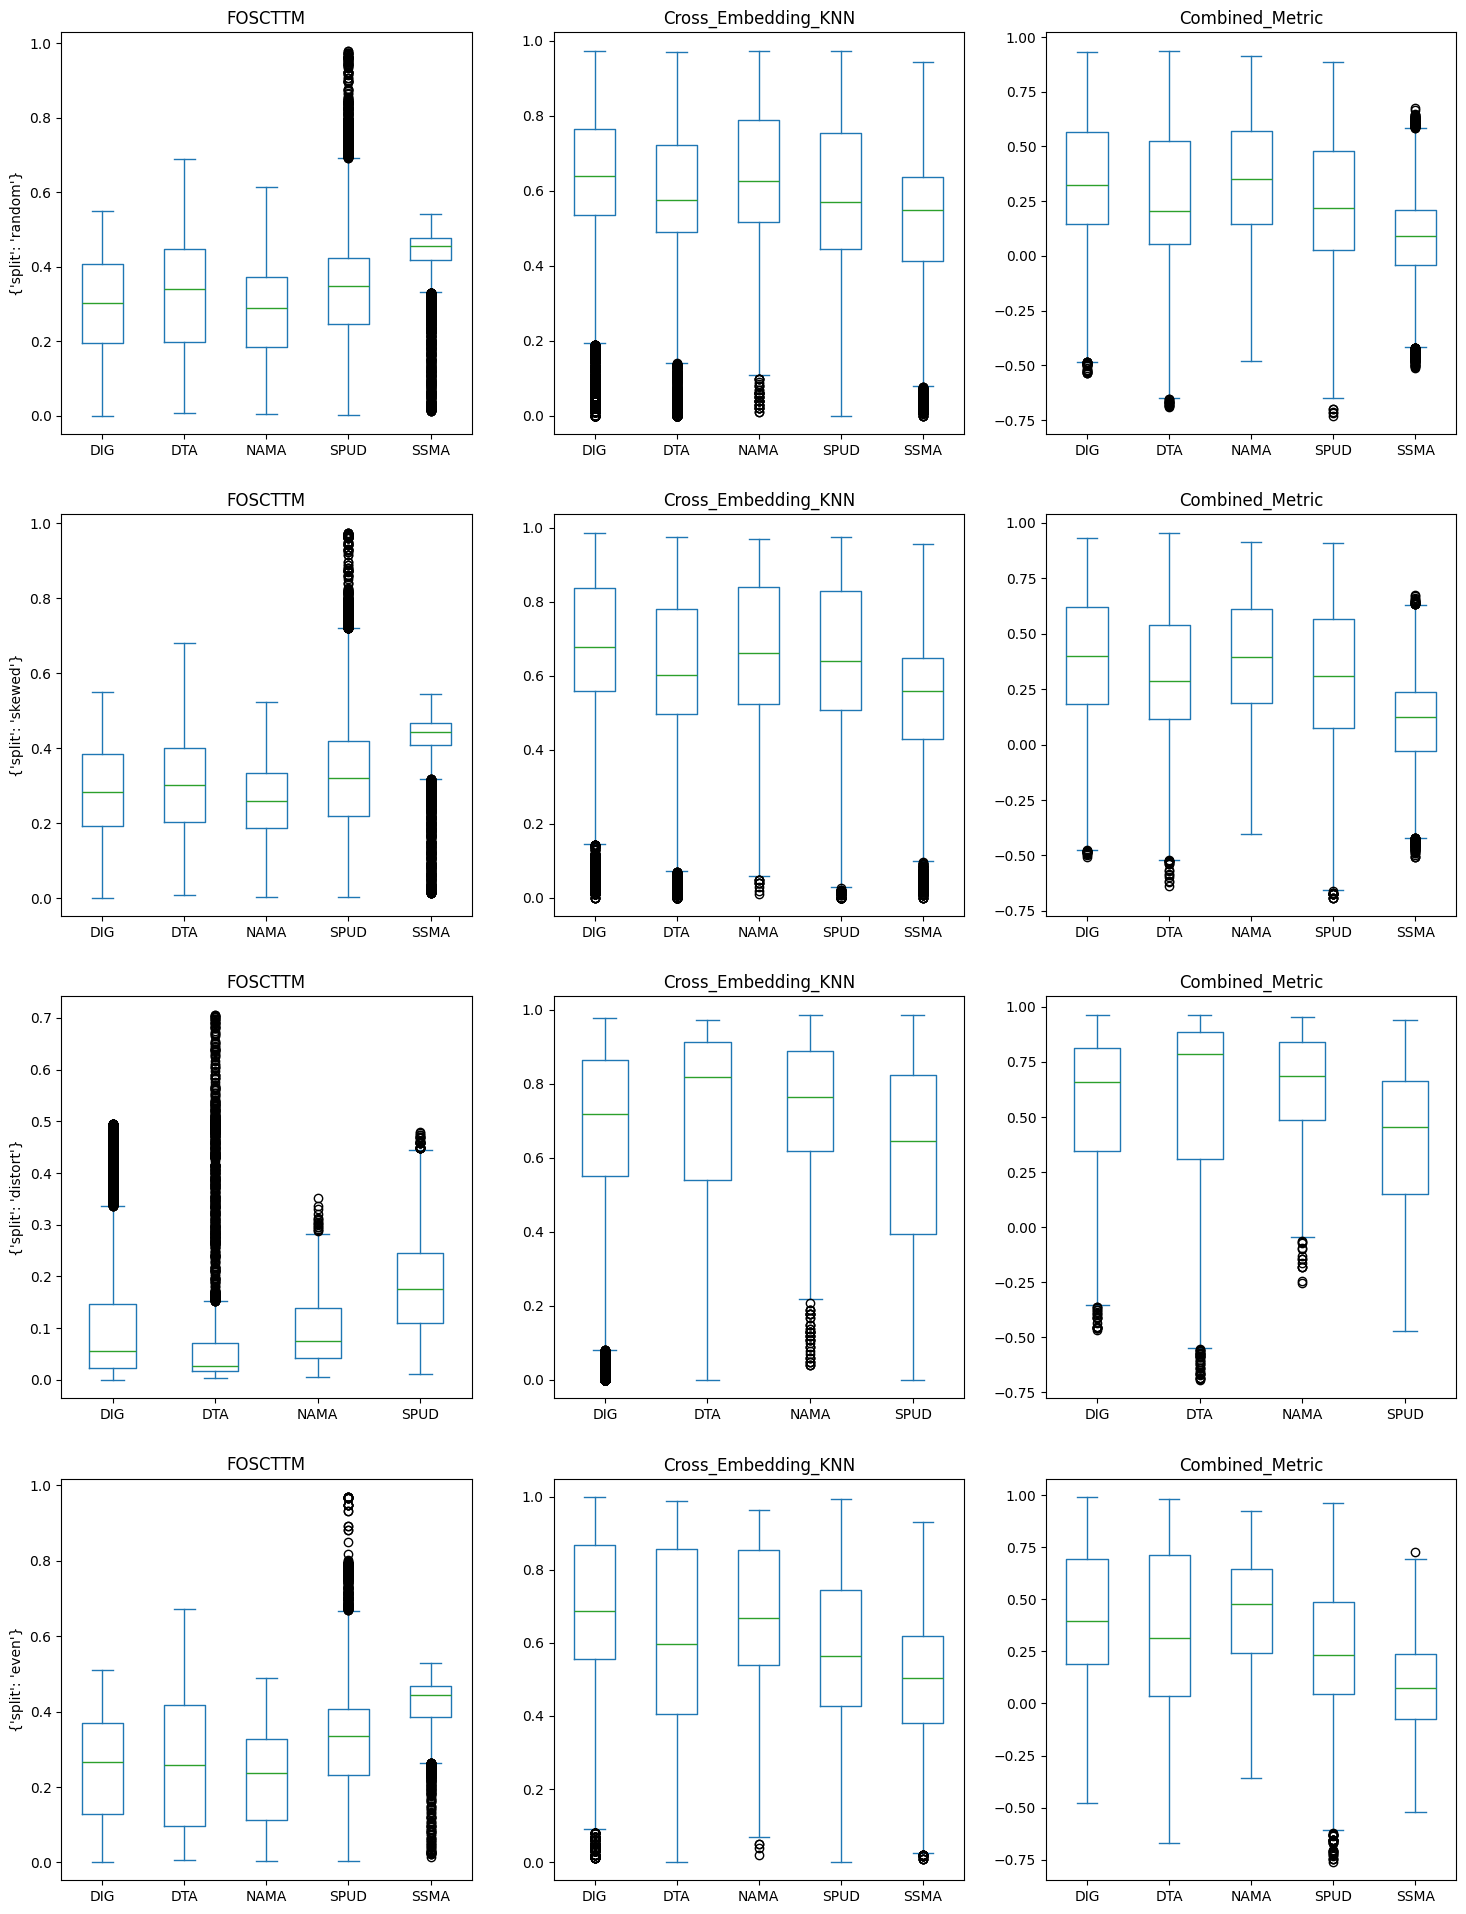

In [5]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Arguments within the same Methods

### DIG

We See that Page Rank has little effect on the overall graph data

In [6]:
#If we want to see only a few csv files at a time, we can sub set it here
#df_subset2 = df[df["csv_file"] == "glass"]

#To see all of it combined
df_subset2 = df

#Change the method to DIG
df_subset2 = df_subset2[df_subset2["method"] == "DIG"]

In [7]:
df_subset2.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,Combined_Metric
213407,audiology,DIG,6648,turn,38.0,0.19,0.10,off-diagonal,0.328004,NaN,NaN,0.222382,0.357895,0.135512
26708,breast_cancer,DIG,1825,distort,114.0,0.17,0.20,None,0.163280,NaN,NaN,0.051907,0.965665,0.913758
132613,ecoli_5,DIG,4557,even,16.0,0.05,0.15,None,0.094393,NaN,NaN,0.263408,0.614679,0.351270
2545,heart_disease,DIG,7959,random,8.0,0.03,0.05,off-diagonal,0.270066,NaN,NaN,0.461347,0.471380,0.010033
335148,glass,DIG,7201,turn,2.0,0.01,0.15,full,0.360678,NaN,NaN,0.024282,0.714953,0.690672


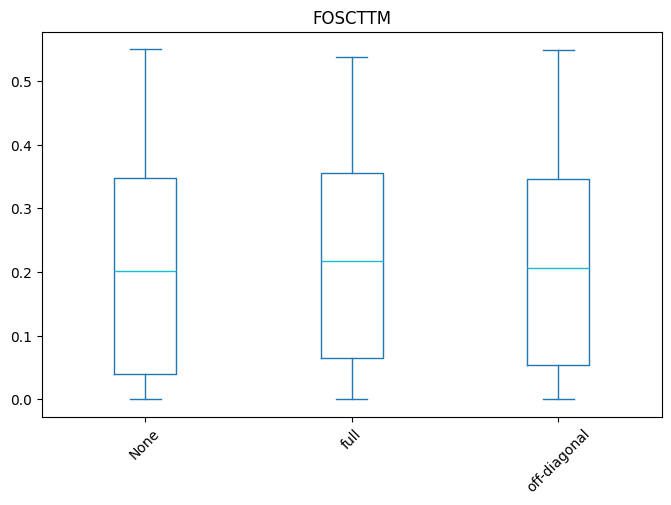

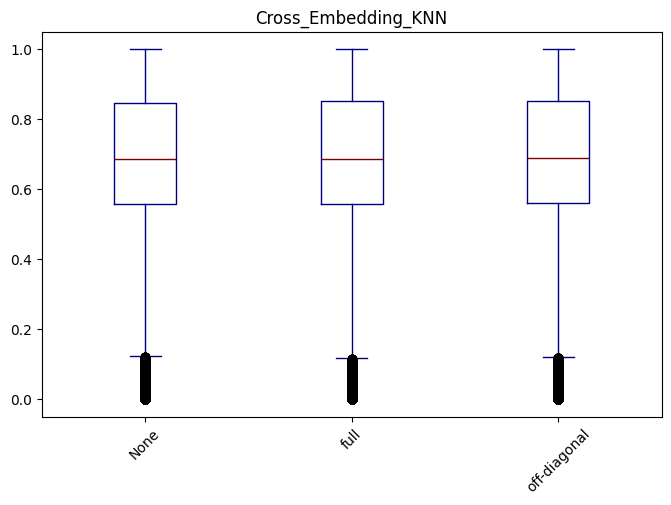

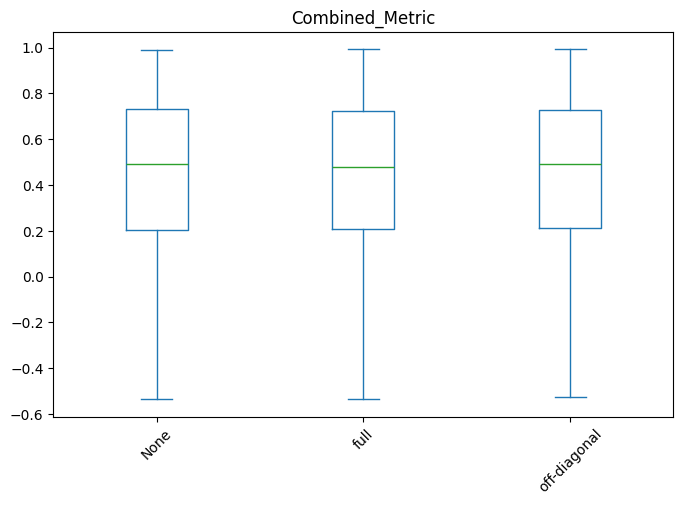

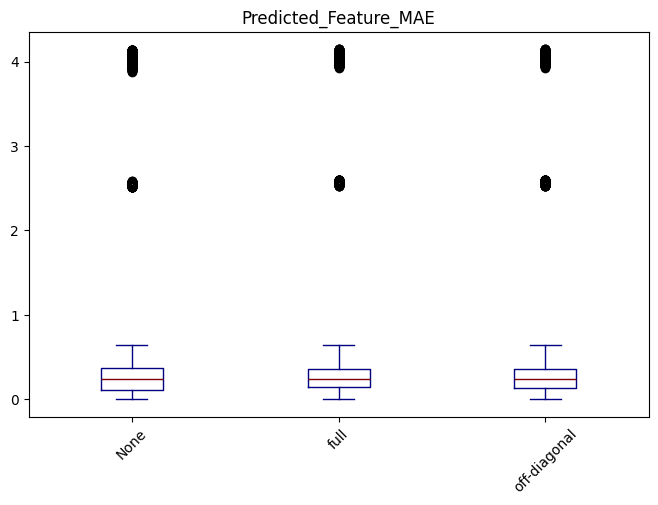

In [8]:
#To make it easier to add edits
key_words = {"figsize": (8, 5),
            "kind": "box",
            "by": "Page_Rank",
            "rot": 45}

df_subset2.plot(column='FOSCTTM', cmap='tab10', **key_words)
df_subset2.plot(column='Cross_Embedding_KNN', cmap = "jet", **key_words)
df_subset2.plot(column='Combined_Metric', **key_words)
df_subset2.plot(column='Predicted_Feature_MAE', cmap = "jet", **key_words)

plt.show()

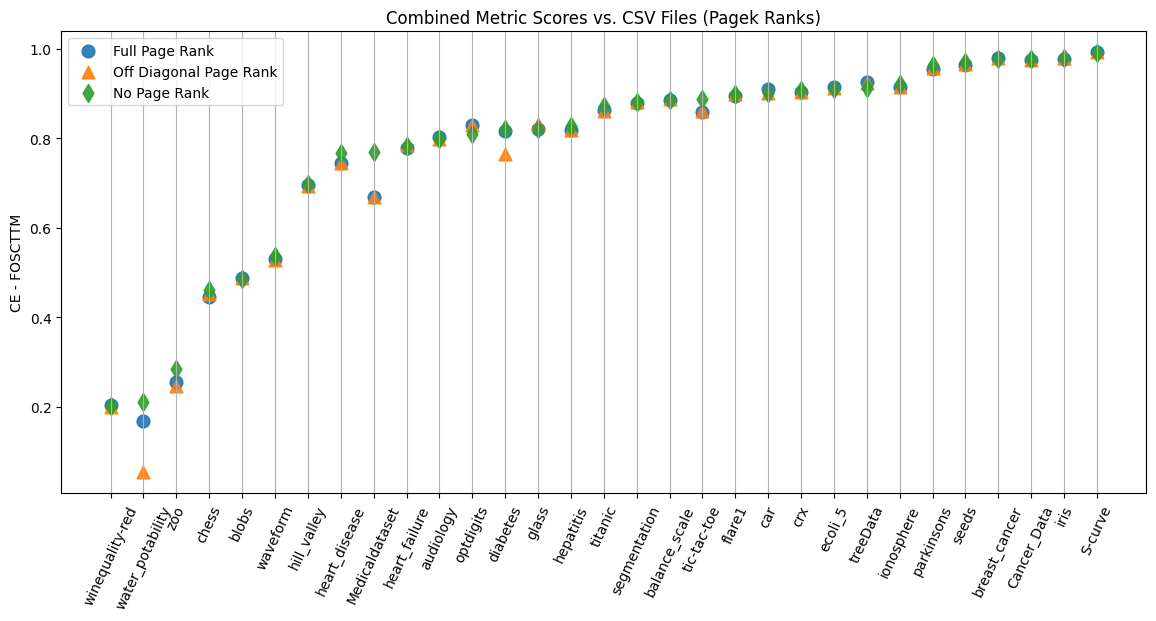

In [9]:
#Create an aggregate DF 
agregate_df = pd.DataFrame({
    'Full_Page_Rank': df[df["Page_Rank"] == "off-diagonal"].groupby("csv_file")["Combined_Metric"].max(),
    'Off-Diagonal_Page_Rank': df[df["Page_Rank"] == "full"].groupby("csv_file")["Combined_Metric"].max(),
    'No_Page_Rank': df[df["Page_Rank"] == "None"].groupby("csv_file")["Combined_Metric"].max()
})


agregate_df = agregate_df.sort_values(by = "No_Page_Rank").reset_index()

#To make it easier to add edits
key_words = {"x" : agregate_df.index,
            "s" : 84,
            "alpha" : .90}

plt.figure(figsize=(14, 6))
ax = plt.scatter(y = agregate_df["Full_Page_Rank"], label = "Full Page Rank", **key_words) #I'm back and forth on the helpfulness of the markers
ax = plt.scatter(y = agregate_df["Off-Diagonal_Page_Rank"], marker = '^', label = "Off Diagonal Page Rank", **key_words)
ax = plt.scatter(y = agregate_df["No_Page_Rank"], marker = 'd', label = "No Page Rank", **key_words)


#Show Legend
plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 65)
plt.title(f"Combined Metric Scores vs. CSV Files (Pagek Ranks)")
plt.ylabel("CE - FOSCTTM")
plt.grid(visible=True, axis = "x")
plt.legend()
plt.show()

### SPUD

Notes:
1. Distance seems to be the best metric (This note was made when we only have iris data tested)

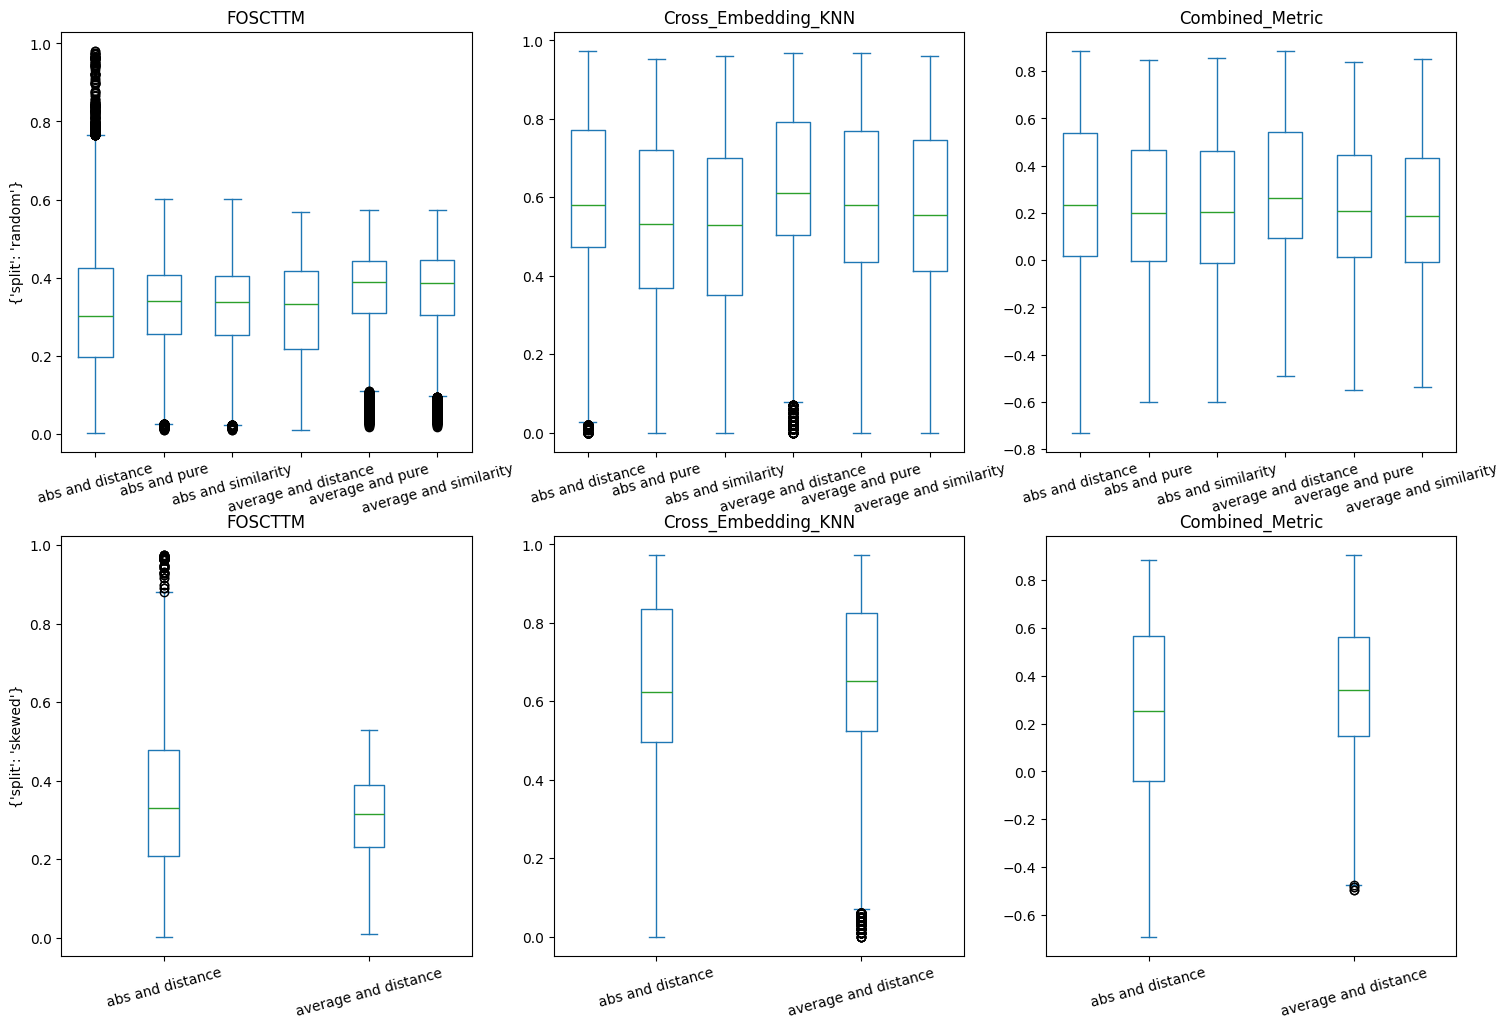

In [10]:
#To make it easier to add edits
key_words = {"figsize": (10, 6),
            "kind": "box",
            "by": "Combined_Arguments",
            "rot": 15}

#Combine DIG argumenst
df_sub = df
df_sub["Combined_Arguments"] = df_sub["Operation"]+ " and " + df_sub["SPUDS_Algorithm"]

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed"#, "csv_file" : "iris"
         }]

plot_in_fig(df = df_sub, columns = columns, rows = rows, **key_words)

## Comparing Methods against CSV Files

In [51]:
def plt_methods_by_CSV_max(df = df, sort_by = "SPUD", return_df =False):
    """df should equal the dataframe. It can be subsetted already
    
    Plots the max of the combined metric for each method to each CSV_File
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].max(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].max(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].max(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].max(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].max()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index,
                "s" : 84,
                "alpha" : .90}

    plt.figure(figsize=(16, 6))
    ax = plt.scatter(y = agregate_df["DTA"], marker = "d", label = "DTA", **key_words)
    ax = plt.scatter(y = agregate_df["SPUD"], label = "SPUD", **key_words) 
    ax = plt.scatter(y = agregate_df["DIG"], marker = '^', label = "DIG", **key_words)
    ax = plt.scatter(y = agregate_df["SSMA"],  marker = 's', label = "SSMA", **key_words)
    ax = plt.scatter(y = agregate_df["NAMA"], marker = '*', label = "NAMA", **key_words)

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"Combined Metric Scores vs. CSV Files (MAX)")
    plt.ylabel("CE - FOSCTTM")
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

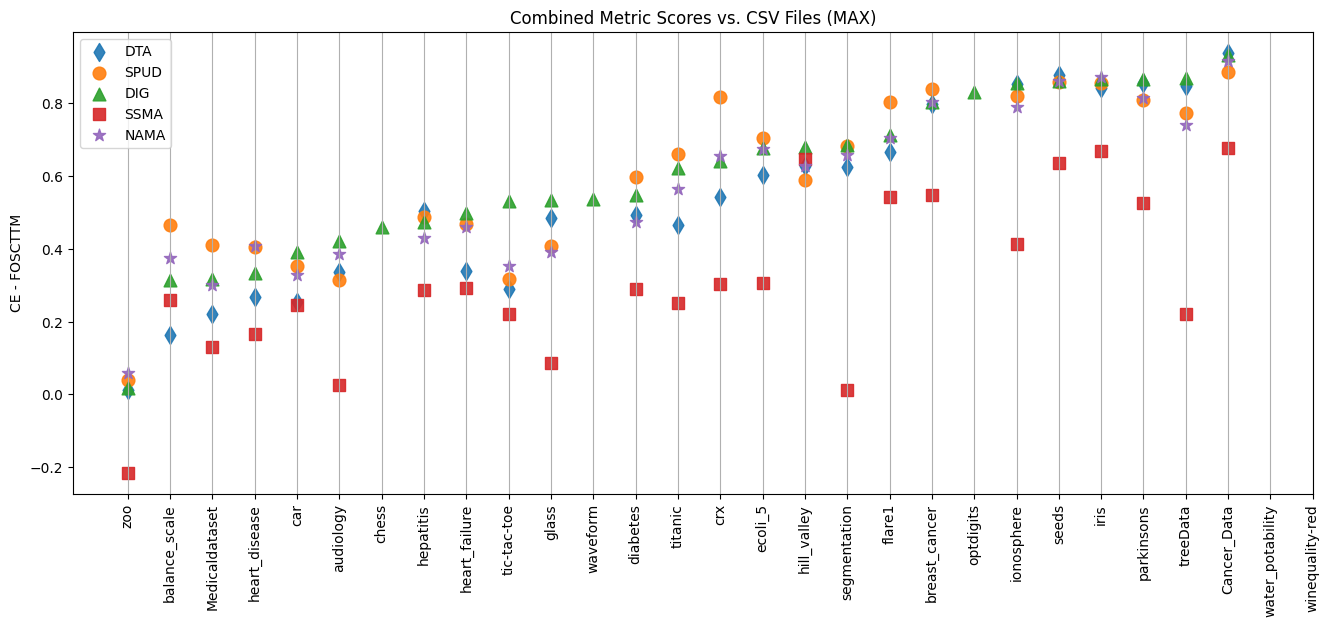

In [52]:
#plt_methods_by_CSV_max(df = df, sort_by = "DIG") #This shows all of the data gather
plt_methods_by_CSV_max(df = subset_df(df, split = "random"), sort_by="DIG")

In [45]:
def plt_methods_by_CSV_mean(df = df, sort_by = "SPUD", return_df = False):
    """Plots 95 percent confident intervals for each method against csv files
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].mean(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].mean(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].mean(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].mean(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].mean()
    })

    #Calculate error bars
    err_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].std() *2,
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].std() *2 ,
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].std()*2,
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].std()*2,
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].std()*2
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"ms" : 8,
                "alpha" : .75}

    plt.figure(figsize=(20, 6))
    ax = plt.errorbar(x = agregate_df.index - 0.1, y = agregate_df["DTA"], yerr = err_df["DTA"], fmt = "d", label = "DTA", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["SPUD"], yerr = err_df["SPUD"], fmt = "o", label = "SPUD", **key_words) 
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["DIG"], yerr = err_df["DIG"],fmt = '^', label = "DIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.1, y = agregate_df["SSMA"], yerr = err_df["SSMA"],fmt = 's', label = "SSMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index - 0.2, y = agregate_df["NAMA"], yerr = err_df["NAMA"],fmt = '*', label = "NAMA", **key_words)

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"Combined Metric Scores vs. CSV Files (MEAN)")
    plt.ylabel("CE - FOSCTTM")
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

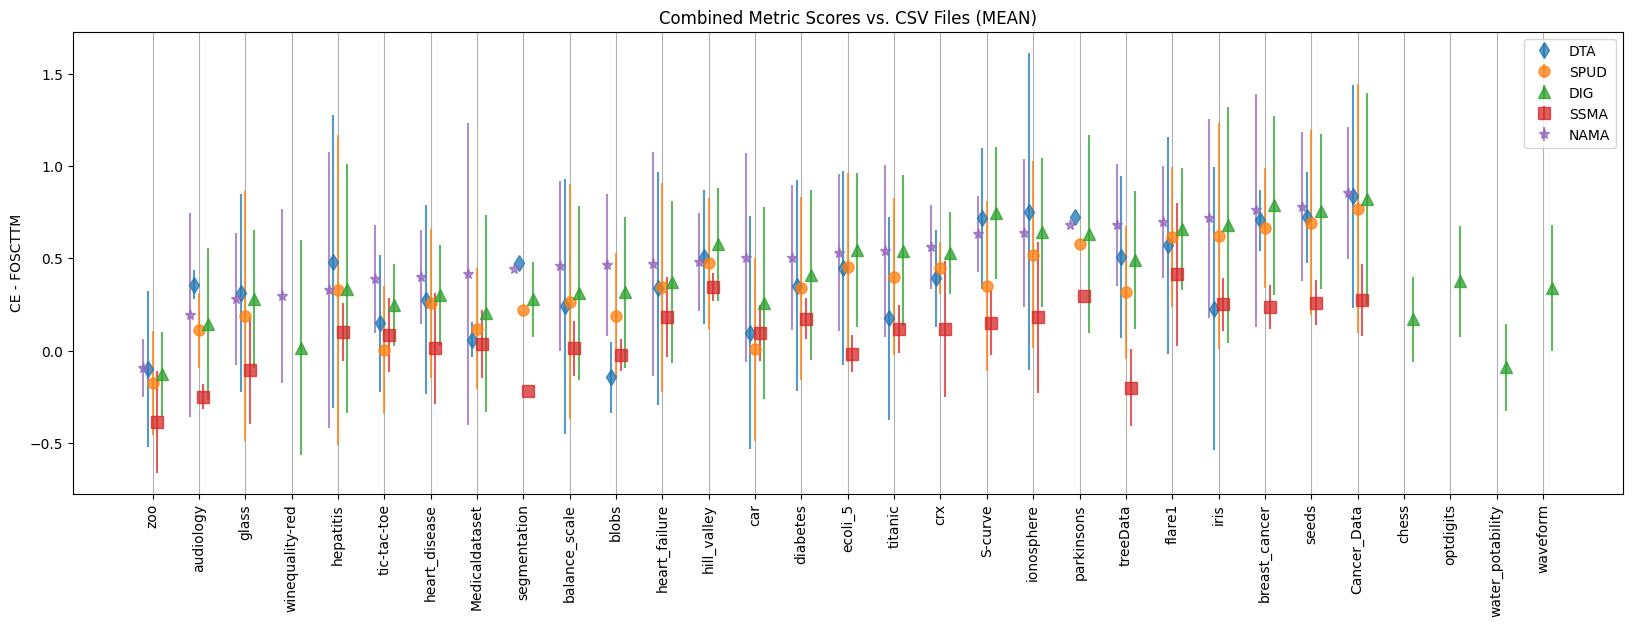

In [46]:
plt_methods_by_CSV_mean(sort_by="NAMA") #This shows all of the data gather
#plt_methods_by_CSV_mean(df = subset_df(df, split = "even"), sort_by="DIG")

### Rankings
TODO: Have results for different splits

In [15]:
def get_ranks(split = 'No'):
    #Sort by Split
    if split != "No":
        split_df = subset_df(df=df, split = split)
    else:
        split_df = df

    #Sort Df by CSV
    csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True)
    df_ranked = csv_df.drop(columns= ["csv_file"]).rank(ascending=False, method='max', axis = 1)


    #This shows which method has preformed the Best overall
    print(f"Ranked across {split} Split\n-----------------------\n{df_ranked.mean(axis = 0)}")
    print(f"\n \nSTD of Ranks across {split} Split\n----------------------------\n{df_ranked.std(axis = 0)}")
    print(f"\n\nNumber of times each Method did best for each CSV\n--------------------------------------------------\n{csv_df.drop(columns= ['csv_file']).idxmax(axis = 1).value_counts()}")
    df_ranked

In [16]:
get_ranks()

Ranked across No Split
-----------------------
SSMA    4.923077
DTA     2.076923
SPUD    2.769231
DIG     1.774194
NAMA    3.259259
dtype: float64

 
STD of Ranks across No Split
----------------------------
SSMA    0.392232
DTA     1.262476
SPUD    0.908083
DIG     0.716923
NAMA    1.129758
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DTA     13
DIG     12
NAMA     3
SPUD     3
Name: count, dtype: int64


In [17]:
get_ranks(split = "random")

Ranked across random Split
-----------------------
SSMA    4.833333
DTA     3.208333
SPUD    2.333333
DIG     1.703704
NAMA    2.833333
dtype: float64

 
STD of Ranks across random Split
----------------------------
SSMA    0.637022
DTA     1.178767
SPUD    1.239448
DIG     0.775332
NAMA    0.963087
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DIG     13
SPUD     8
NAMA     3
DTA      3
Name: count, dtype: int64


In [18]:
get_ranks(split = "even")

Ranked across even Split
-----------------------
SSMA    4.833333
DTA     2.444444
SPUD    3.333333
DIG     1.888889
NAMA    2.500000
dtype: float64

 
STD of Ranks across even Split
----------------------------
SSMA    0.707107
DTA     1.247219
SPUD    0.970143
DIG     0.900254
NAMA    1.098127
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DIG     7
DTA     6
NAMA    4
SPUD    1
Name: count, dtype: int64


In [19]:
get_ranks(split = "skewed")

Ranked across skewed Split
-----------------------
SSMA    4.714286
DTA     2.809524
SPUD    3.476190
DIG     1.619048
NAMA    2.380952
dtype: float64

 
STD of Ranks across skewed Split
----------------------------
SSMA    0.783764
DTA     1.209093
SPUD    0.928388
DIG     0.669043
NAMA    1.160870
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DIG     10
NAMA     7
DTA      4
Name: count, dtype: int64


In [20]:
get_ranks(split = "distort")

Ranked across distort Split
-----------------------
SSMA         NaN
DTA     1.428571
SPUD    3.000000
DIG     1.538462
NAMA    2.250000
dtype: float64

 
STD of Ranks across distort Split
----------------------------
SSMA         NaN
DTA     1.133893
SPUD    0.534522
DIG     0.859338
NAMA    1.064581
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DIG     16
DTA      6
NAMA     4
Name: count, dtype: int64


## Comparing Percent of anchors and KNN values

In [21]:
def line_plot_methods(subset = "None", argument = "Percent_of_Anchors"):
    "subset should equal none or the csv file name"

    #Subset the data
    if subset != "None":
        df_subset = df[df["csv_file"] == subset]
    else:
        df_subset = df
    
    #Create figure
    plt.figure(figsize=(14,7))

    #Plot the graphs
    plt.plot(df_subset[df_subset["method"] == "SSMA"].groupby(argument)["Combined_Metric"].mean(), label = "SSMA")
    plt.plot(df_subset[df_subset["method"] == "DTA"].groupby(argument)["Combined_Metric"].mean(), label = "DTA")
    plt.plot(df_subset[df_subset["method"] == "DIG"].groupby(argument)["Combined_Metric"].mean(), label = "DIG")

    #Show different SPUD arguments
    plt.plot(df_subset[df_subset["Operation"] == "average"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Avg")
    plt.plot(df_subset[df_subset["Operation"] == "abs"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Abs")

    if argument != "Percent_of_KNN":
        plt.plot(df_subset[df_subset["method"] == "NAMA"].groupby(argument)["Combined_Metric"].mean(), label = "NAMA")



    #Make it pretty
    plt.xlabel(argument)
    plt.ylabel("Combined Metric Score (CE - FOSCTTM)")
    plt.legend()
    plt.title("Methods Together")

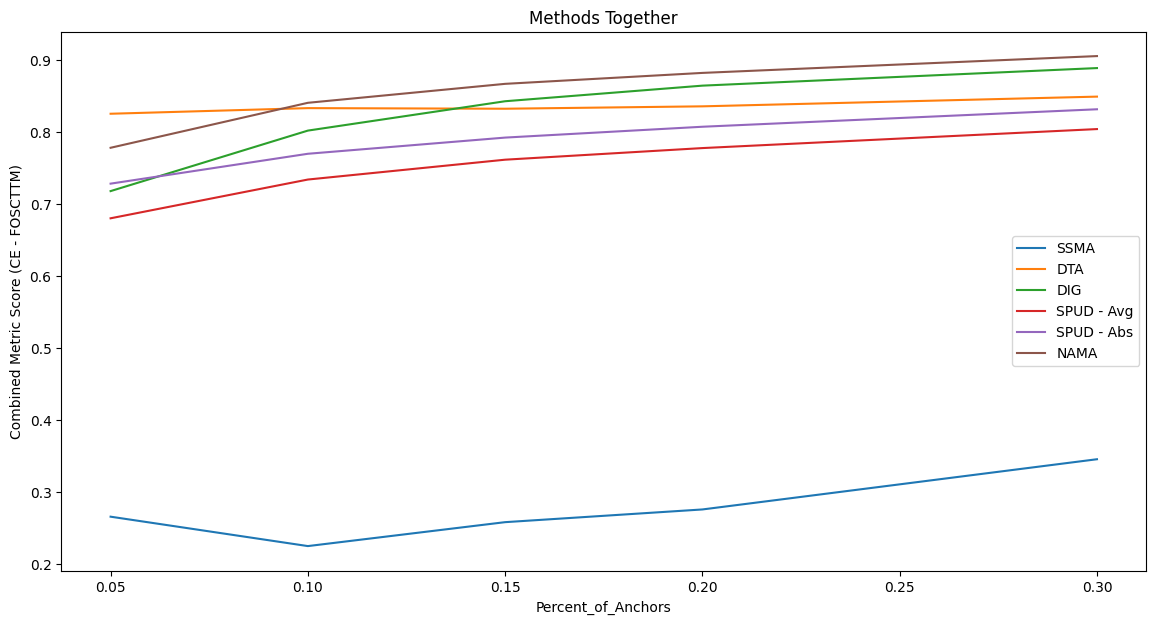

In [22]:
line_plot_methods(subset = "Cancer_Data")

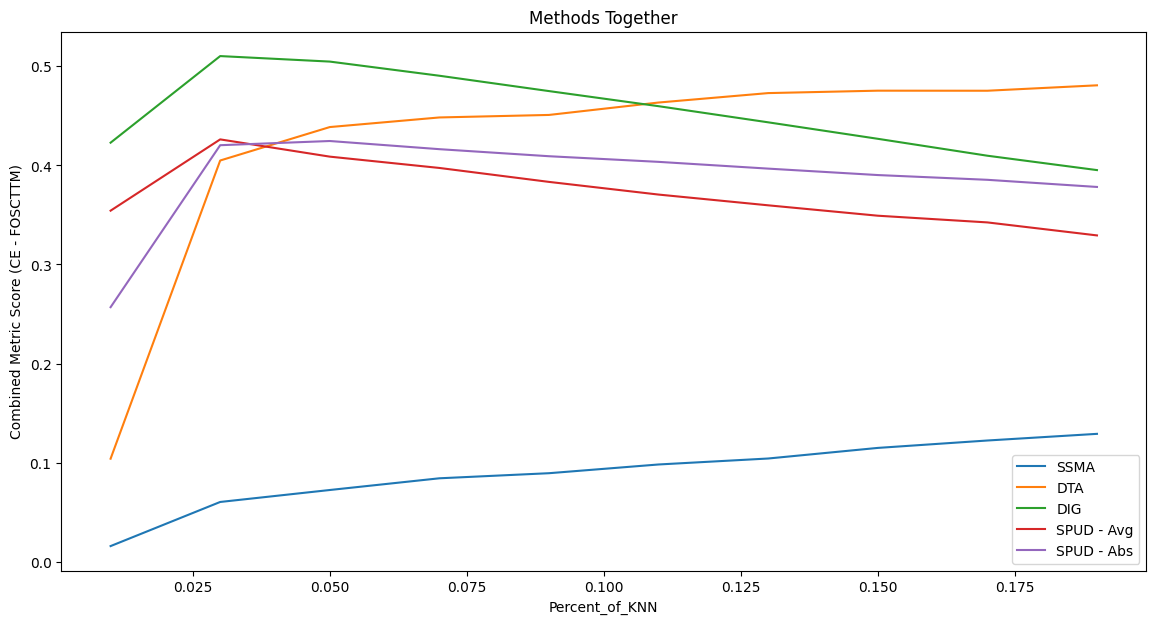

In [23]:
line_plot_methods(argument = "Percent_of_KNN")

## Plotting the Embeddings

In [53]:
visual_test = tma.test_manifold_algorithms(csv_file="S-curve", split= "skewed", percent_of_anchors= [0.1, 0.25], verbose=2)


 
 
---------------------------       Initalizing class with S-curve data       ---------------------------

Creating swiss rolls and S curve data
The knn values are: (2, 7, 12, 17, 22, 27, 32, 37, 42, 47)


Percent of anchors used: 0.25
The amount of Nearest Neighbors: 5


/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


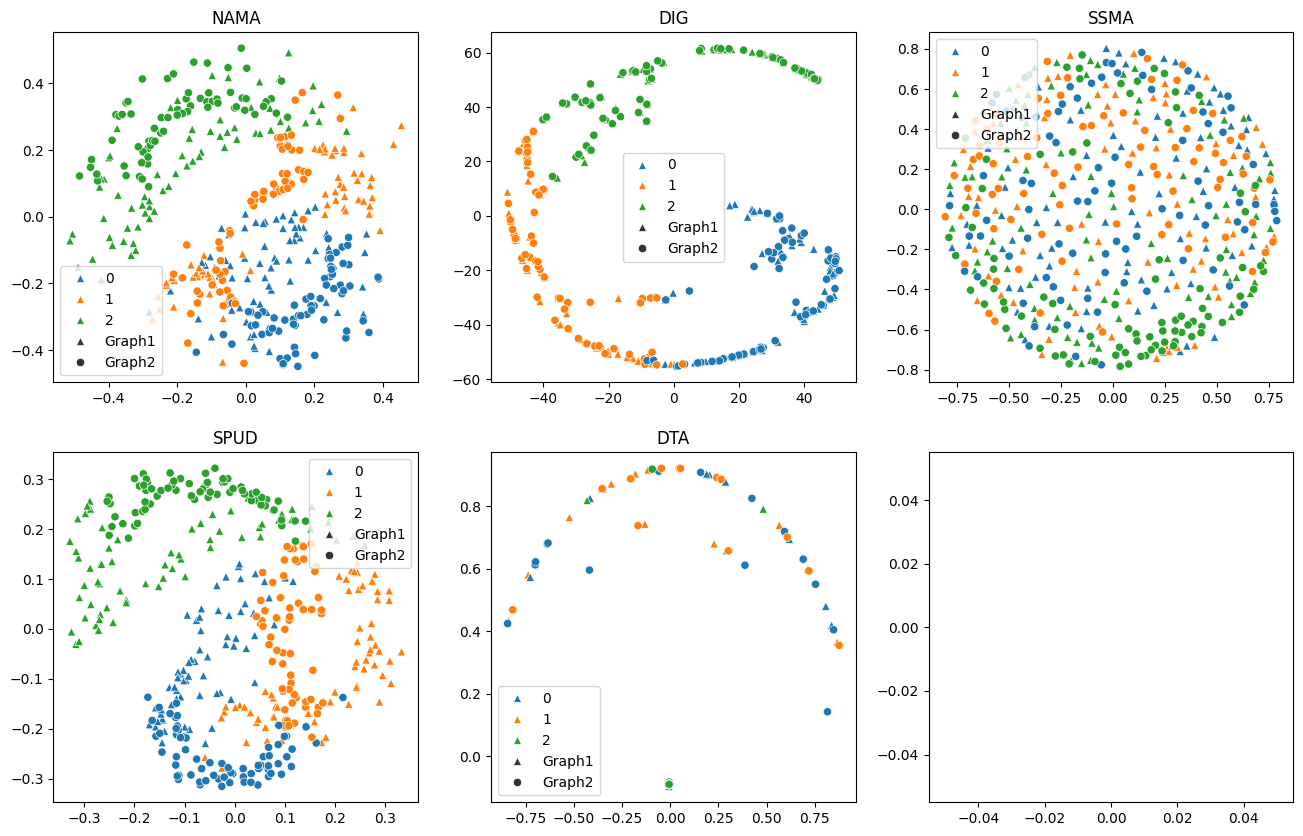

In [54]:
visual_test.plot_embeddings(knn = 5)

Percent of anchors used: 0.25
The amount of Nearest Neighbors: 48


/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:747: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


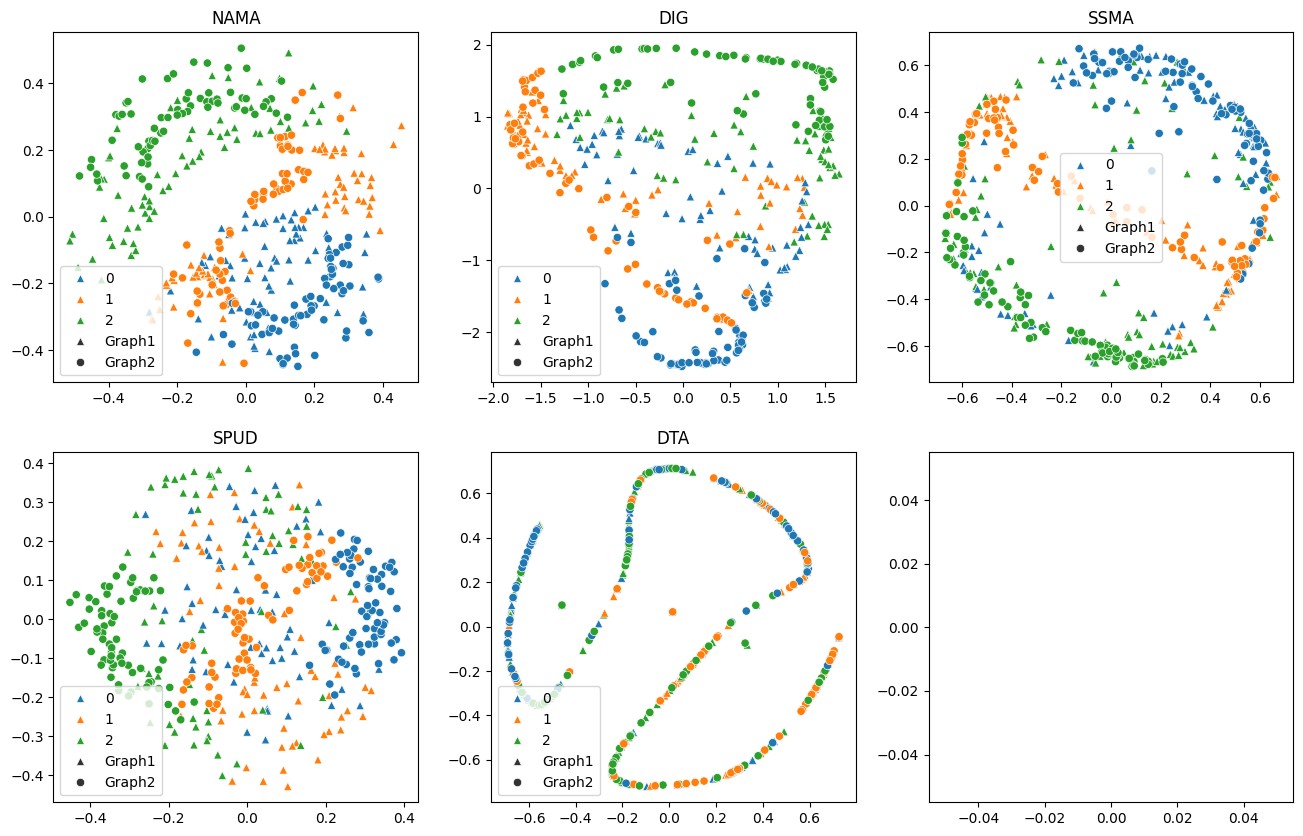

In [55]:
visual_test.plot_embeddings(knn = 48, operation = "abs")

# Debugging Tests Below